<a href="https://colab.research.google.com/github/SarthV/Machine-Learning-with-Python/blob/master/Machine-Learning-with-Python/Topic%20Modelling%20and%20Sentiment%20Analysis/Topic_Modelling_with_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from google.colab import drive
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim import corpora

In [0]:
!python -m pip install -U pyLDAvis

In [0]:
import pyLDAvis
import pyLDAvis.gensim

Mounting Google drive and reading the dataset

In [45]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_json("/content/drive/My Drive/Colab Notebooks/Musical_Instruments_5.json", lines=True)

#### Since I am a pianist myself, so chose the Amazon musical instruments review dataset :)

In [47]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so ...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]","The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the sc...",5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]","The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequen...",5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoi...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### Preprocessing and analysing the reviews.
Creating a wordcloud to see approximately the most frequently occuring words in all of the reviews combined.


In [0]:
from PIL import Image

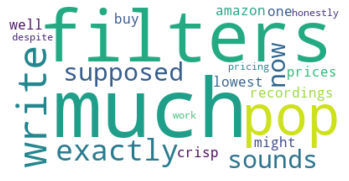

In [49]:
temp_text = df.reviewText[0] ## wordcloud of one review
wordcloud = WordCloud(background_color= "white").generate(temp_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
## Wordcloud for all of the reviews
text_all = " ".join(review for review in df.reviewText)
print(len(text_all)) ## total words

4996378


In [0]:
stopwords1 = set(STOPWORDS)
stopwords1.update(["tuning", "tone", "melody", "volume"])

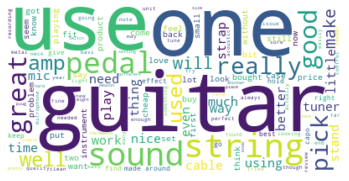

In [52]:
wordcloud1 = WordCloud(stopwords=stopwords1, background_color= "white").generate(text_all)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
## Not a lot of piano reviews tbh ;_;
en_stopwords = stopwords.words('english')
en_stopwords.extend(["tune", "melody", "wood"])
## You may extend the stopword list as per your requirement or the dataset
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-z#]", " ")

def removeStopwords(reviews):
  rev_no_stopwords = " ".join([i for i in reviews if i not in en_stopwords])
  ##print(rev_no_stopwords) - help debug
  ##print("\n\n") - help debug
  return rev_no_stopwords

rev_no_stop = [removeStopwords(i.split()) for i in df['reviewText']]

## rev_no_stop is a list of all the cleaned reviews.
## removeStopwords function takes in a review as input and returns the review excluding the stopwords in it.

In [98]:
print(len(rev_no_stop))
rev_no_stop[0] ## help debug

10261


'Not much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricing'

In [200]:
reviewlist = [i.lower() for i in rev_no_stop]
reviewlisttemp = reviewlist
reviewlist[0]

'not much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricing'

In [201]:
## Setting up a lemmatizer, the same way as we had in the practice session. Refer LDA practice.ipynb
lemmatizer = WordNetLemmatizer()
def lemmatize(review):
  lemmaReview = " ".join(lemmatizer.lemmatize(i) for i in review.split()) 
  return lemmaReview

reviewlist = [lemmatize(j) for j in reviewlist]

reviewlist[0] ## help debug

## tokenizing ezch review, i.e. creating a bag of words model

reviewlist = [i.split() for i in reviewlist]
print(reviewlist[0])


['not', 'much', 'write', 'exactly', 'supposed', 'filter', 'pop', 'sound', 'recording', 'much', 'crisp', 'one', 'lowest', 'price', 'pop', 'filter', 'amazon', 'might', 'well', 'buy', 'honestly', 'work', 'despite', 'pricing']


### Building our LDA model 

In [0]:
dictionary  = corpora.Dictionary(reviewlist)
dt_matrix = [dictionary.doc2bow(review) for review in reviewlist]

In [0]:
Lda = gensim.models.ldamodel.LdaModel

In [0]:
my_lda_model = Lda(dt_matrix, 5, dictionary, passes=65)

Below is a table consisting of the 5 topics.<br/>
Each topic is indexed with an integer, and as it can be seen each topic is comprised of words along with their relative weights.
It is also to be noted that the addition of all these weights in a topic equals one. Yes you guessed it right, these weights are nothing but the probability that the particular word belongs to the respective topic. 

In [117]:
my_lda_model.print_topics()

[(0,
  '0.089*"i" + 0.020*"pick" + 0.019*"great" + 0.015*"guitar" + 0.014*"good" + 0.013*"one" + 0.013*"price" + 0.010*"like" + 0.009*"sound" + 0.009*"bought"'),
 (1,
  '0.041*"i" + 0.014*"cable" + 0.013*"the" + 0.011*"mic" + 0.009*"recording" + 0.008*"use" + 0.007*"good" + 0.007*"headphone" + 0.006*"work" + 0.006*"microphone"'),
 (2,
  '0.050*"i" + 0.023*"pedal" + 0.017*"amp" + 0.016*"sound" + 0.010*"the" + 0.009*"it" + 0.009*"like" + 0.008*"tone" + 0.008*"one" + 0.007*"get"'),
 (3,
  '0.066*"i" + 0.053*"string" + 0.017*"guitar" + 0.014*"capo" + 0.013*"sound" + 0.010*"the" + 0.009*"#" + 0.008*"tone" + 0.007*"like" + 0.007*"d"'),
 (4,
  '0.051*"i" + 0.024*"guitar" + 0.015*"it" + 0.014*"the" + 0.013*"one" + 0.013*"tuner" + 0.011*"stand" + 0.010*"strap" + 0.010*"this" + 0.010*"work"')]

In [119]:
my_lda_model[dt_matrix[0]] ## shows to which topic our first review might belong. 0.47 and 0.5 are the respective probabilities.

[(0, 0.4750486), (1, 0.5004341)]

Here we see that in all of the 5 topics the word "***I***" is present, which actually isn't helpful for us at all. To make the text analysis  more useful, we will now try to eradicate/ remove all the words with 2 or less than 2 letters from all the reviews in the dataset.<br/>


In [0]:
def removeSmallwords(ReviewList):
  reviewlistnew1 = [' '.join(w for w in p.split() if len(w)>2) for p in ReviewList]
  return reviewlistnew1


In [212]:
reviewlistnew = removeSmallwords(reviewlisttemp)
reviewlistnew[0] ## debug check

'not much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricing'

In [0]:
reviewlistnew = [lemmatize(j) for j in reviewlistnew]

In [0]:
reviewlistnew = [i.split() for i in reviewlistnew]

In [0]:
## applying the same process now
dt_matrix_new = [dictionary.doc2bow(review) for review in reviewlistnew]
my_lda_model_new = Lda(dt_matrix_new, 5, dictionary, passes=65)


In [220]:
my_lda_model_new.print_topics()

[(0,
  '0.016*"cable" + 0.013*"one" + 0.013*"great" + 0.011*"work" + 0.011*"pedal" + 0.011*"good" + 0.011*"quality" + 0.010*"price" + 0.010*"the" + 0.009*"use"'),
 (1,
  '0.029*"guitar" + 0.016*"one" + 0.013*"the" + 0.013*"pick" + 0.013*"tuner" + 0.010*"capo" + 0.010*"use" + 0.010*"strap" + 0.010*"this" + 0.010*"work"'),
 (2,
  '0.025*"sound" + 0.024*"amp" + 0.022*"pedal" + 0.012*"like" + 0.012*"the" + 0.011*"tone" + 0.009*"get" + 0.008*"guitar" + 0.007*"great" + 0.007*"one"'),
 (3,
  '0.065*"string" + 0.021*"guitar" + 0.018*"sound" + 0.010*"great" + 0.010*"tone" + 0.009*"the" + 0.009*"they" + 0.009*"like" + 0.009*"good" + 0.008*"play"'),
 (4,
  '0.020*"stand" + 0.014*"the" + 0.013*"mic" + 0.011*"recording" + 0.008*"use" + 0.008*"headphone" + 0.008*"microphone" + 0.006*"work" + 0.006*"good" + 0.005*"well"')]

Finally no more "I" in the results, that is somewhat reassuring!
Now one can easily make out the titles for the topics from their respective weighted words. <br/>
***Also guitar and mic recordings are way more talked about than piano in the market I guess  :(***


**This plot below allows us to easily visualize the topics and play around a bit.**

In [222]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(my_lda_model_new, dt_matrix_new, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.022452 -0.063587       1        1  31.858089
2     -0.040470  0.028540       2        1  22.883011
0      0.020432 -0.152316       3        1  19.280804
3     -0.155652  0.096906       4        1  13.568624
4      0.198142  0.090456       5        1  12.409473, topic_info=       Term         Freq        Total Category  logprob  loglift
896  string  4156.000000  4156.000000  Default  30.0000  30.0000
167     amp  2532.000000  2532.000000  Default  29.0000  29.0000
190   pedal  3354.000000  3354.000000  Default  28.0000  28.0000
179  guitar  6625.000000  6625.000000  Default  27.0000  27.0000
16    sound  4416.000000  4416.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
11      one   291.697205  4821.483887   Topic5  -5.2990  -0.7184
332     bit   229.007889  1100.647949   Topic5  -5.5410   0.5168
41     like   268.501556  3984.231934   Topic5  -5.3819  -0.6105
35     even   231.425583  1339.752563   Topic5  -5.5305   0.3307
232    time   233.234833  1946.095825   Topic5  -5.5227  -0.0348

[370 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4761      1  0.964374  accurate
4761      2  0.026064  accurate
4761      5  0.009774  accurate
306       1  0.509413  acoustic
306       2  0.126670  acoustic
...     ...       ...       ...
165       1  0.249332      year
165       2  0.120426      year
165       3  0.308697      year
165       4  0.261205      year
165       5  0.061061      year

[612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 5])